In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

In [4]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征
x1, y1 = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3
x2, y2 = make_gaussian_quantiles(mean=(3, 3), n_samples=500, n_features=2, n_classes=2)
# 将两组数据合成一组数据
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, - y2 + 1))

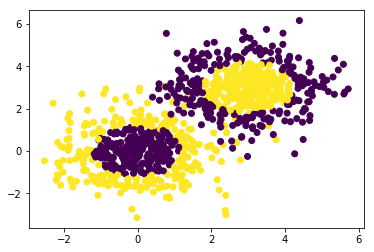

In [5]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [6]:
# 决策树模型
model = tree.DecisionTreeClassifier(max_depth=3)

# 输入数据建立模型
model.fit(x_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
# 模型准确率
model.score(x_data,y_data)

0.784

In [8]:
# AdaBoost模型
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
# 训练模型
model.fit(x_data, y_data)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [9]:
# 模型准确率
model.score(x_data,y_data)

0.979